In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout


# **Data Exploration**


In [2]:
# mengambil lokasi file dataset
file_data = 'https://raw.githubusercontent.com/Pixel4bit/Data-BMKG/main/Dataset_BMKG_2013-2024_Jakarta.csv'

# membaca file dataset
climate_data = pd.read_csv(file_data)
print(climate_data)

         Tanggal    Tn    Tx  Tavg  RH_avg     RR   ss  ff_x  ddd_x  ff_avg  \
0     01-01-2013  24.0  31.8  26.2    91.0    1.7  3.5   6.0  310.0     3.0   
1     02-01-2013  25.0  31.4  27.9    79.0    0.0  1.2   4.0  300.0     3.0   
2     03-01-2013  26.0  32.6  28.6    79.0    1.3  3.5   5.0  320.0     4.0   
3     04-01-2013  25.0  30.2  26.3    86.0   34.4  0.4   9.0  270.0     5.0   
4     05-01-2013  24.0  30.8  26.6    82.0    6.4  4.8   7.0  270.0     4.0   
...          ...   ...   ...   ...     ...    ...  ...   ...    ...     ...   
4044  28-01-2024  25.0  30.6  27.4    85.0   28.0  0.0   5.0  320.0     1.0   
4045  29-01-2024  25.0  29.8  27.2    88.0   24.0  1.2   5.0  320.0     1.0   
4046  30-01-2024  24.6  32.8  26.9    88.0   17.6  0.8   5.0  320.0     1.0   
4047  31-01-2024  25.0  31.4  27.9    81.0  110.5  0.7   4.0  320.0     1.0   
4048  01-02-2024  25.0  31.6  27.8    83.0    0.0  2.2   7.0  340.0     1.0   

     ddd_car  
0         NW  
1         NW  
2     

In [3]:
# untuk mengecek tipe data
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  4049 non-null   object 
 1   Tn       4049 non-null   float64
 2   Tx       4049 non-null   float64
 3   Tavg     4049 non-null   float64
 4   RH_avg   4049 non-null   float64
 5   RR       4049 non-null   float64
 6   ss       4049 non-null   float64
 7   ff_x     4049 non-null   float64
 8   ddd_x    4049 non-null   float64
 9   ff_avg   4049 non-null   float64
 10  ddd_car  4049 non-null   object 
dtypes: float64(9), object(2)
memory usage: 348.1+ KB


In [4]:
#menampilkan dataset dalam bentuk tabel atau data frame
climate_data = pd.DataFrame(climate_data)
climate_data #menampilkan output nya

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2013,24.0,31.8,26.2,91.0,1.7,3.5,6.0,310.0,3.0,NW
1,02-01-2013,25.0,31.4,27.9,79.0,0.0,1.2,4.0,300.0,3.0,NW
2,03-01-2013,26.0,32.6,28.6,79.0,1.3,3.5,5.0,320.0,4.0,NW
3,04-01-2013,25.0,30.2,26.3,86.0,34.4,0.4,9.0,270.0,5.0,W
4,05-01-2013,24.0,30.8,26.6,82.0,6.4,4.8,7.0,270.0,4.0,W
...,...,...,...,...,...,...,...,...,...,...,...
4044,28-01-2024,25.0,30.6,27.4,85.0,28.0,0.0,5.0,320.0,1.0,C
4045,29-01-2024,25.0,29.8,27.2,88.0,24.0,1.2,5.0,320.0,1.0,C
4046,30-01-2024,24.6,32.8,26.9,88.0,17.6,0.8,5.0,320.0,1.0,C
4047,31-01-2024,25.0,31.4,27.9,81.0,110.5,0.7,4.0,320.0,1.0,C


In [5]:
climate_data.describe() # menampilkan perhitungan statistik dari tiap tiap variabel

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000
mean,25.683453,32.327785,28.515559,76.184984,6.065152,4.331909,4.503087,242.217338,1.452704
std,0.985105,1.540496,1.048321,6.255402,16.824326,2.507841,1.471418,106.273547,0.705567
min,22.000000,23.800000,24.100000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,31.600000,27.900000,72.000000,0.000000,2.300000,4.000000,150.000000,1.000000
50%,26.000000,32.500000,28.600000,76.000000,0.000000,4.500000,4.000000,290.000000,1.000000
75%,26.200000,33.400000,29.300000,80.000000,3.500000,6.400000,5.000000,320.000000,2.000000
max,28.100000,37.000000,34.300000,96.000000,277.500000,9.900000,15.000000,360.000000,5.000000


In [6]:
climate_data.isnull().sum() # mengecek missing value atau data kosong

Tanggal    0
Tn         0
Tx         0
Tavg       0
RH_avg     0
RR         0
ss         0
ff_x       0
ddd_x      0
ff_avg     0
ddd_car    0
dtype: int64

In [7]:
# print(climate_data.iloc[2192]) #mengecek data didalam baris/index tertentu
climate_data["Tanggal"] = pd.to_datetime(climate_data["Tanggal"], format="%d-%m-%Y") # format tipe data pada kolom tanggal agar sesuai
climate_data # menampilkan ouptut setelah konversi tipe data di kolom tanggal

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2013-01-01,24.0,31.8,26.2,91.0,1.7,3.5,6.0,310.0,3.0,NW
1,2013-01-02,25.0,31.4,27.9,79.0,0.0,1.2,4.0,300.0,3.0,NW
2,2013-01-03,26.0,32.6,28.6,79.0,1.3,3.5,5.0,320.0,4.0,NW
3,2013-01-04,25.0,30.2,26.3,86.0,34.4,0.4,9.0,270.0,5.0,W
4,2013-01-05,24.0,30.8,26.6,82.0,6.4,4.8,7.0,270.0,4.0,W
...,...,...,...,...,...,...,...,...,...,...,...
4044,2024-01-28,25.0,30.6,27.4,85.0,28.0,0.0,5.0,320.0,1.0,C
4045,2024-01-29,25.0,29.8,27.2,88.0,24.0,1.2,5.0,320.0,1.0,C
4046,2024-01-30,24.6,32.8,26.9,88.0,17.6,0.8,5.0,320.0,1.0,C
4047,2024-01-31,25.0,31.4,27.9,81.0,110.5,0.7,4.0,320.0,1.0,C


In [8]:
climate_data.set_index('Tanggal', inplace=True) # mengatur kolom Tanggal sebagai index utama dari Data Frame climate_data karena dataset ini berupa timeseries
climate_data

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2013-01-01,24.0,31.8,26.2,91.0,1.7,3.5,6.0,310.0,3.0,NW
2013-01-02,25.0,31.4,27.9,79.0,0.0,1.2,4.0,300.0,3.0,NW
2013-01-03,26.0,32.6,28.6,79.0,1.3,3.5,5.0,320.0,4.0,NW
2013-01-04,25.0,30.2,26.3,86.0,34.4,0.4,9.0,270.0,5.0,W
2013-01-05,24.0,30.8,26.6,82.0,6.4,4.8,7.0,270.0,4.0,W
...,...,...,...,...,...,...,...,...,...,...
2024-01-28,25.0,30.6,27.4,85.0,28.0,0.0,5.0,320.0,1.0,C
2024-01-29,25.0,29.8,27.2,88.0,24.0,1.2,5.0,320.0,1.0,C
2024-01-30,24.6,32.8,26.9,88.0,17.6,0.8,5.0,320.0,1.0,C


# **Visualisasi**

## Visualisasi Temperatur

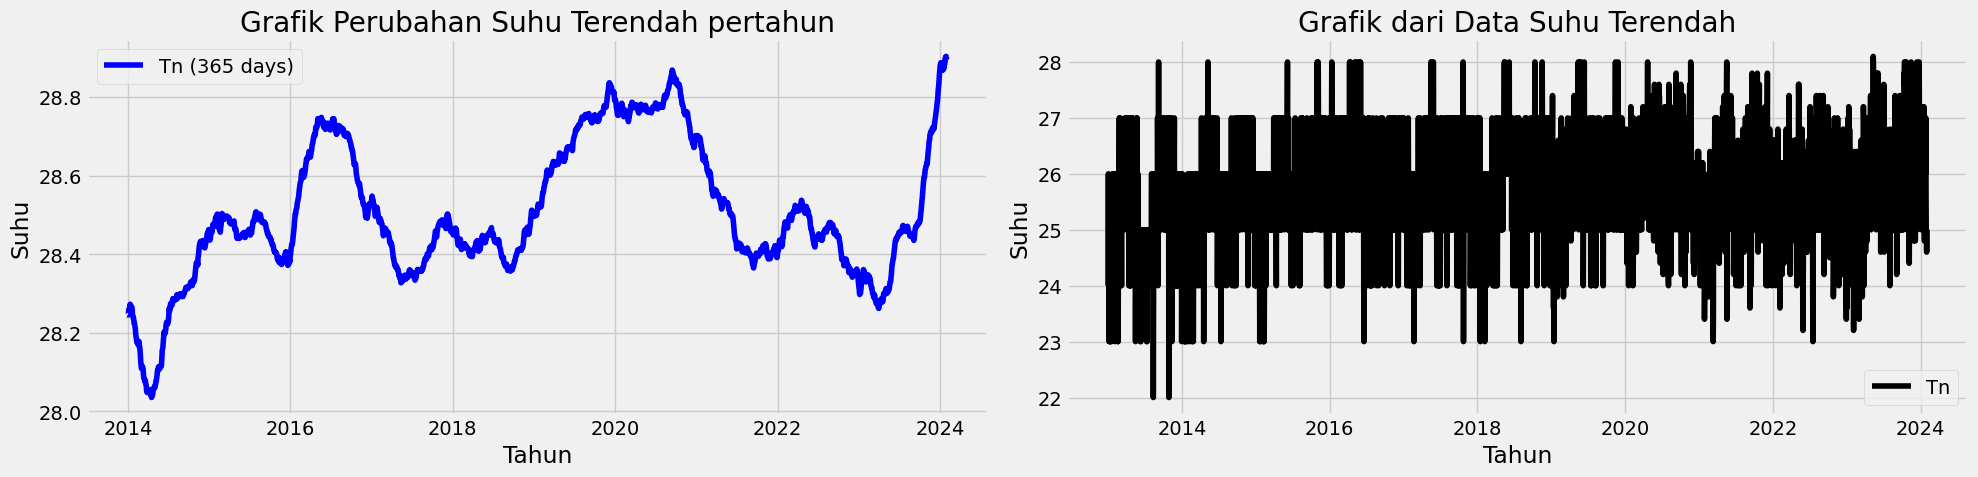

In [9]:
rolling_avg = climate_data['Tavg'].rolling(window=365).mean()

# Membuat kanvas untuk kebutuhan visualisasi dengan setting 2 kolom 1 baris dengan ukuran 20x5
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# melakukan plotting di kolom pertama
axs[0].plot(rolling_avg, label='Tn (365 days)', color='blue')
axs[0].set_title('Grafik Perubahan Suhu Terendah pertahun')
axs[0].set_xlabel('Tahun')
axs[0].set_ylabel('Suhu')
axs[0].legend()

# melakukan plotting semua data dari 'Tn' suhu terendah di kolom kedua
axs[1].plot(climate_data['Tn'], label='Tn', color='black')
axs[1].set_title('Grafik dari Data Suhu Terendah')
axs[1].set_xlabel('Tahun')
axs[1].set_ylabel('Suhu')
axs[1].legend()

# untuk menampilkan hasil plotting dengan visual di persempit agar lebih rapih
plt.tight_layout()
plt.show()

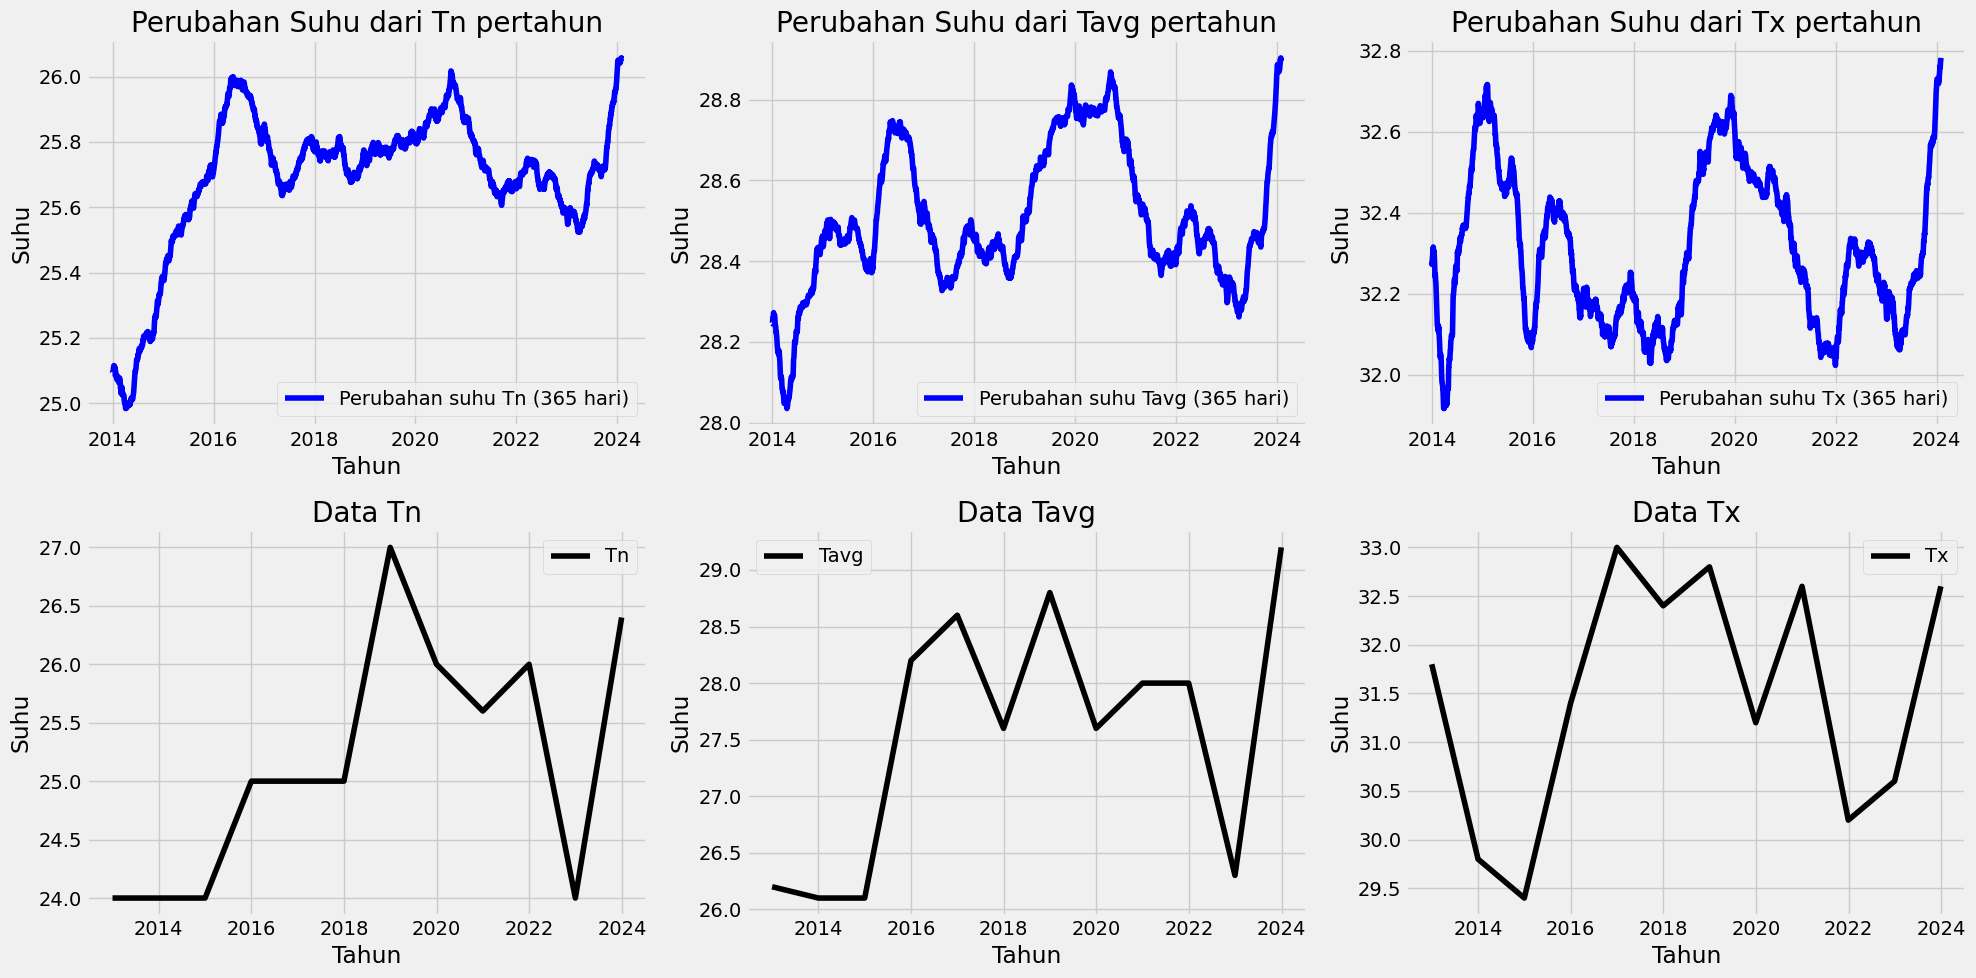

In [10]:
# List kolom yang mau divisualisasi
columns_to_plot = ['Tn', 'Tavg', 'Tx']

# Mengatur parameter matplotlib untuk plotting
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (20, 10)
# plt.rcParams['axes.prop_cycle'] = cycler(color=['#1f77b4'])

fig, axs = plt.subplots(nrows=2, ncols=3)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through the columns and create the plots for the first row
# Perulangan untuk menentukan urutan kolom dan membuat plotting untuk baris pertama
for i, column in enumerate(columns_to_plot):
    # Calculate the rolling average for each column
    # Untuk menghitung rolling average dari data yang ada di list kolom
    rolling_avg = climate_data[column].rolling(window=365).mean()

    # Plot the rolling average on the first row of subplots
    # Plotting hasil dari rolling average di baris pertama
    axs[i].plot(rolling_avg, label=f'Perubahan suhu {column} (365 hari)', color='blue')
    axs[i].set_title(f'Perubahan Suhu dari {column} pertahun')
    axs[i].set_xlabel('Tahun')
    axs[i].set_ylabel('Suhu')
    axs[i].legend()

# Loop through the columns and create the plots for the second row
# Perulangan untuk menentukan urutan kolom otomatis dan membuat plotting untuk baris kedua
for i, column in enumerate(columns_to_plot):
    # Plot all data from each column on the second row of subplots
    axs[i + 3].plot(climate_data[column][::365], label=f'{column}', color='black')
    axs[i + 3].set_title(f'Data {column}')
    axs[i + 3].set_xlabel('Tahun')
    axs[i + 3].set_ylabel('Suhu')
    axs[i + 3].legend()

# Adjust the layout so that subplots fit into the figure area
# untuk mengatur tampilan plotting agar lebih rapih
plt.tight_layout()

# Display the plots
# menampilkan hasil plotting
plt.show()



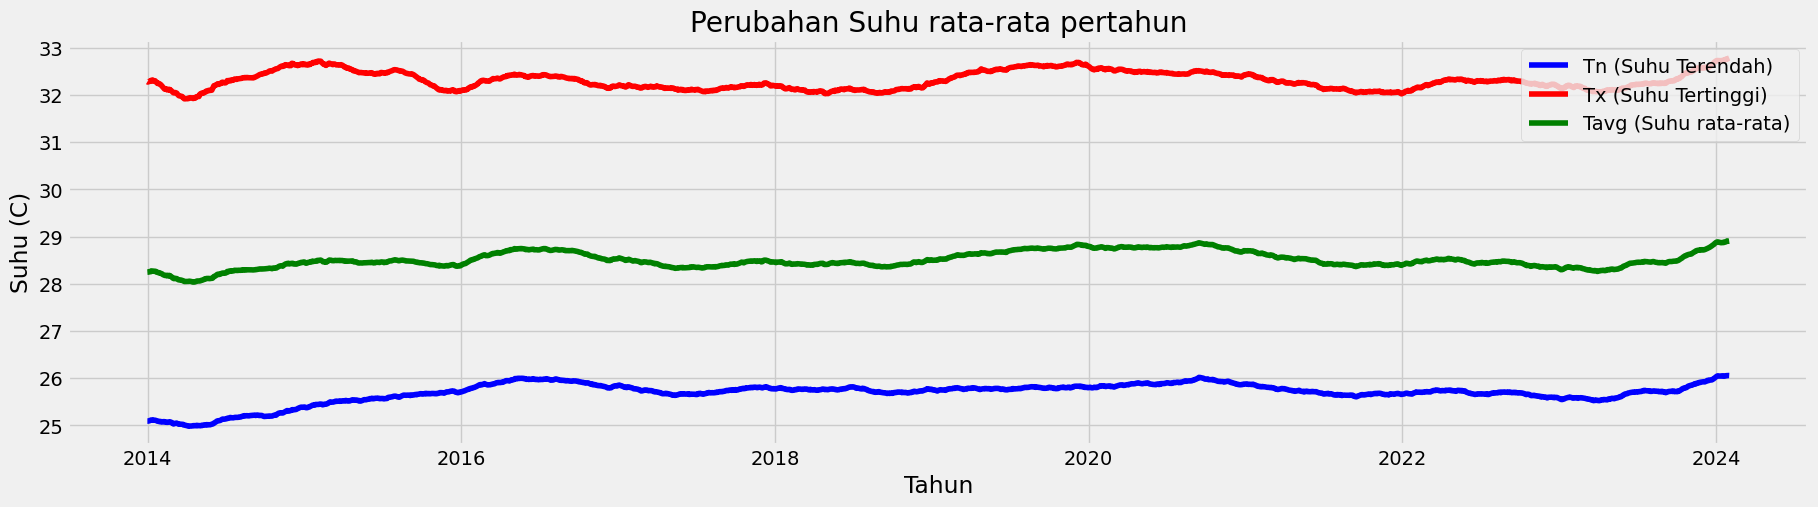

In [11]:
# Calculate the rolling average for each temperature column
rolling_avg_Tn = climate_data['Tn'].rolling(window=365).mean()
rolling_avg_Tx = climate_data['Tx'].rolling(window=365).mean()
rolling_avg_Tavg = climate_data['Tavg'].rolling(window=365).mean()

# Plot the rolling averages on the same plot
plt.figure(figsize=(20, 5))
plt.plot(rolling_avg_Tn, label='Tn (Suhu Terendah)', color='blue')
plt.plot(rolling_avg_Tx, label='Tx (Suhu Tertinggi)', color='red')
plt.plot(rolling_avg_Tavg, label='Tavg (Suhu rata-rata)', color='green')

plt.xlabel('Tahun')
plt.ylabel('Suhu (C)')
plt.title('Perubahan Suhu rata-rata pertahun')

plt.legend()

plt.show()

## Visualisasi Kelembapan (RH_avg)

Text(0, 0.5, 'Kelembapan (%)')

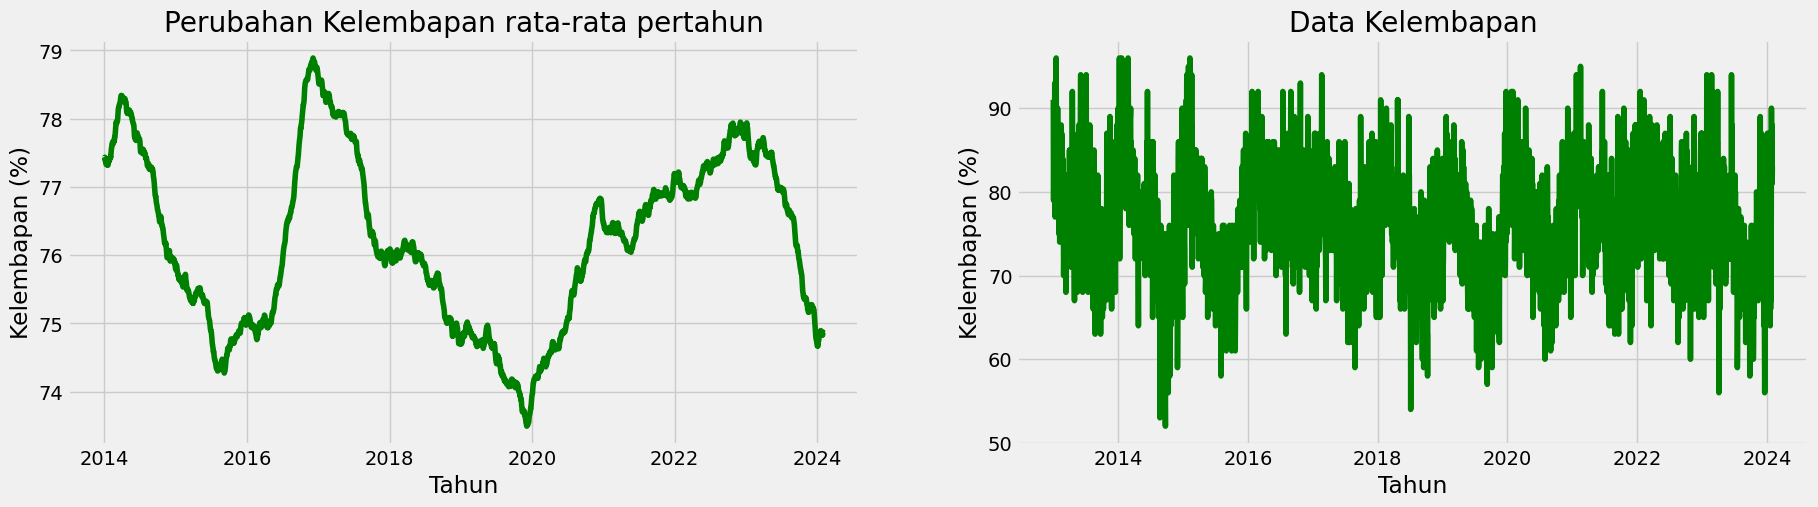

In [12]:
rolling_avg_RH_avg = climate_data['RH_avg'].rolling(window=365).mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].plot(rolling_avg_RH_avg, label='Perubahan RH (365) hari', color='green')
axs[0].set_title('Perubahan Kelembapan rata-rata pertahun')
axs[0].set_xlabel('Tahun')
axs[0].set_ylabel('Kelembapan (%)')

axs[1].plot(climate_data['RH_avg'], label='Kelembapan', color='green')
axs[1].set_title('Data Kelembapan')
axs[1].set_xlabel('Tahun')
axs[1].set_ylabel('Kelembapan (%)')

## Visualisasi Curah Hujan (RR)

Text(0, 0.5, 'Curah Hujan (mm)')

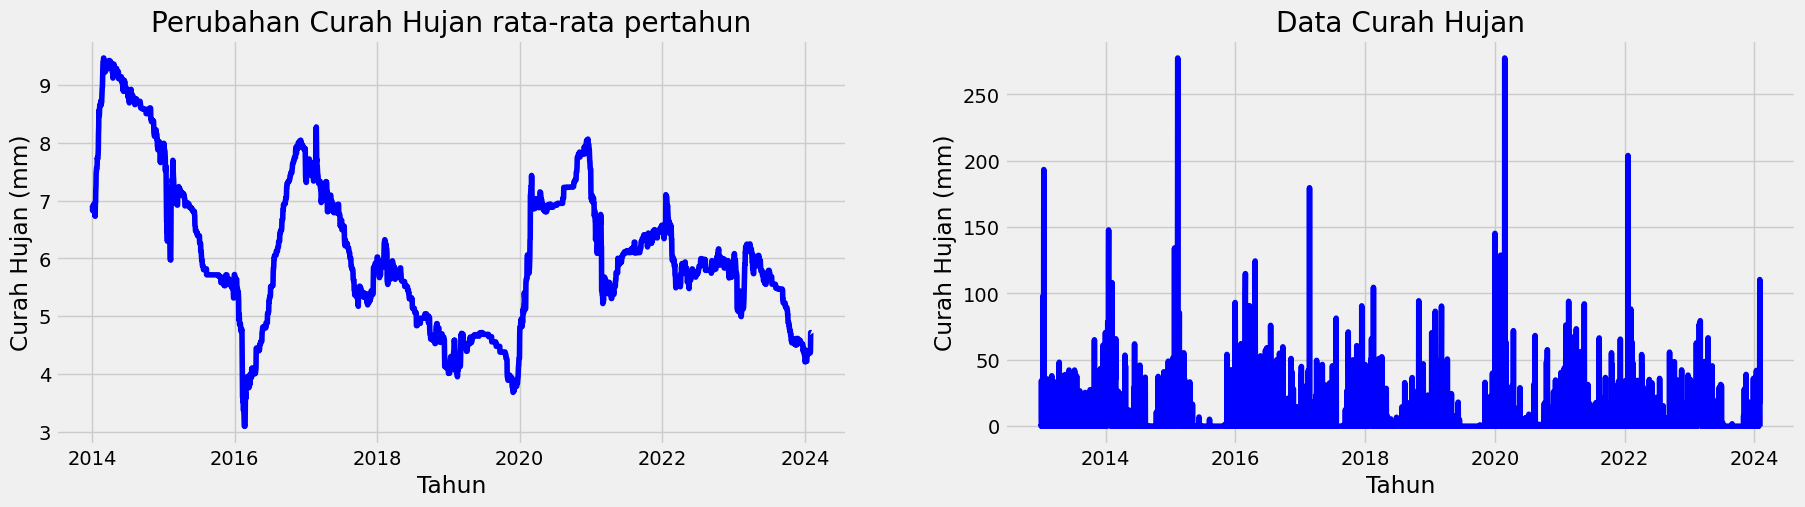

In [13]:
rolling_avg_RR = climate_data['RR'].rolling(window=365).mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].plot(rolling_avg_RR, label='Perubahan RR (365) hari', color='blue')
axs[0].set_title('Perubahan Curah Hujan rata-rata pertahun')
axs[0].set_xlabel('Tahun')
axs[0].set_ylabel('Curah Hujan (mm)')

axs[1].plot(climate_data['RR'], label='Curah Hujan', color='blue')
axs[1].set_title('Data Curah Hujan')
axs[1].set_xlabel('Tahun')
axs[1].set_ylabel('Curah Hujan (mm)')

Visualisasi Lamanya waktu penyinaran Matahari (ss)

Text(0, 0.5, 'Jam')

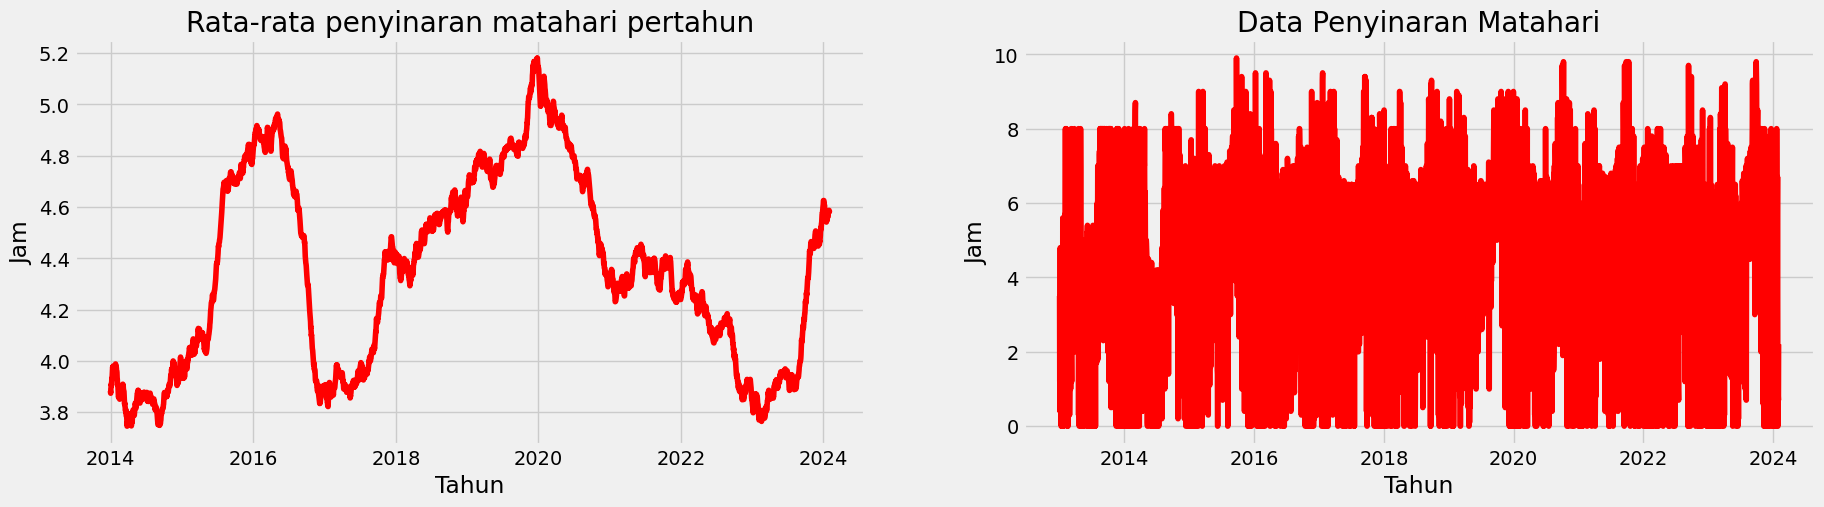

In [14]:
rolling_avg_ss = climate_data['ss'].rolling(365).mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].plot(rolling_avg_ss, label='penyinaran matahari (365) hari', color='red')
axs[0].set_title('Rata-rata penyinaran matahari pertahun')
axs[0].set_xlabel('Tahun')
axs[0].set_ylabel('Jam')

axs[1].plot(climate_data['ss'], label='penyinaran matahari', color='red')
axs[1].set_title('Data Penyinaran Matahari')
axs[1].set_xlabel('Tahun')
axs[1].set_ylabel('Jam')

# **Perancangan Machine Learning Recurrent Neural Network**

## Memilih Kolom prediksi

In [15]:
climate_data.head(5) # untuk menampilkan 5 data pertama dari climate_dataset

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2013-01-01,24.0,31.8,26.2,91.0,1.7,3.5,6.0,310.0,3.0,NW
2013-01-02,25.0,31.4,27.9,79.0,0.0,1.2,4.0,300.0,3.0,NW
2013-01-03,26.0,32.6,28.6,79.0,1.3,3.5,5.0,320.0,4.0,NW
2013-01-04,25.0,30.2,26.3,86.0,34.4,0.4,9.0,270.0,5.0,W
2013-01-05,24.0,30.8,26.6,82.0,6.4,4.8,7.0,270.0,4.0,W


In [16]:
cols = list(climate_data)[0:5] # untuk memilih dataset yang akan digunakan untuk proses pelatihan model
print(cols)

['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR']


In [17]:
dataset = climate_data[cols].astype(float) # membuat variabel baru untuk menyimpan dataset yang akan dilatih dan merubah nya data nya ke type float untuk kebutuhan proses kalkulasi agar lebih akurat
dataset.head(3) # menampilkan 3 data pertama dari dataset_untuk_dilatih

,Tn,Tx,Tavg,RH_avg,RR
Tanggal,,,,,
2013-01-01,24.0,31.8,26.2,91.0,1.7
2013-01-02,25.0,31.4,27.9,79.0,0.0
2013-01-03,26.0,32.6,28.6,79.0,1.3


In [18]:
judul = list(dataset.columns)
judul

['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR']

In [19]:
judul[0], judul[1] = judul[1], judul[0] # menukar urutan kolom beserta dengan datanya
judul

['Tx', 'Tn', 'Tavg', 'RH_avg', 'RR']

In [20]:
dataset = dataset[judul] # urutan kolom setelah dirubah posisi nya, dimana kolom posisi pertama yang akan menjadi variabel prediksi dengan memanfaatkan 4 variabel yang lain untuk proses pelatihan
dataset

,Tx,Tn,Tavg,RH_avg,RR
Tanggal,,,,,
2013-01-01,31.8,24.0,26.2,91.0,1.7
2013-01-02,31.4,25.0,27.9,79.0,0.0
2013-01-03,32.6,26.0,28.6,79.0,1.3
2013-01-04,30.2,25.0,26.3,86.0,34.4
2013-01-05,30.8,24.0,26.6,82.0,6.4
...,...,...,...,...,...
2024-01-28,30.6,25.0,27.4,85.0,28.0
2024-01-29,29.8,25.0,27.2,88.0,24.0
2024-01-30,32.8,24.6,26.9,88.0,17.6


In [21]:
dataset.info() # menampilkan info dari dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4049 entries, 2013-01-01 to 2024-02-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tx      4049 non-null   float64
 1   Tn      4049 non-null   float64
 2   Tavg    4049 non-null   float64
 3   RH_avg  4049 non-null   float64
 4   RR      4049 non-null   float64
dtypes: float64(5)
memory usage: 189.8 KB


## Membagi dataset

In [22]:
train_size = int(len(dataset) * 0.9)
print(f"Ukuran Data latih: {train_size}")

Ukuran Data latih: 3644


In [23]:
data_untuk_dilatih = dataset[:train_size]
data_untuk_ditest = dataset[train_size:]

print(f'Data latih: {data_untuk_dilatih.shape}')
print(f'Data uji: {data_untuk_ditest.shape}')

Data latih: (3644, 5)
Data uji: (405, 5)


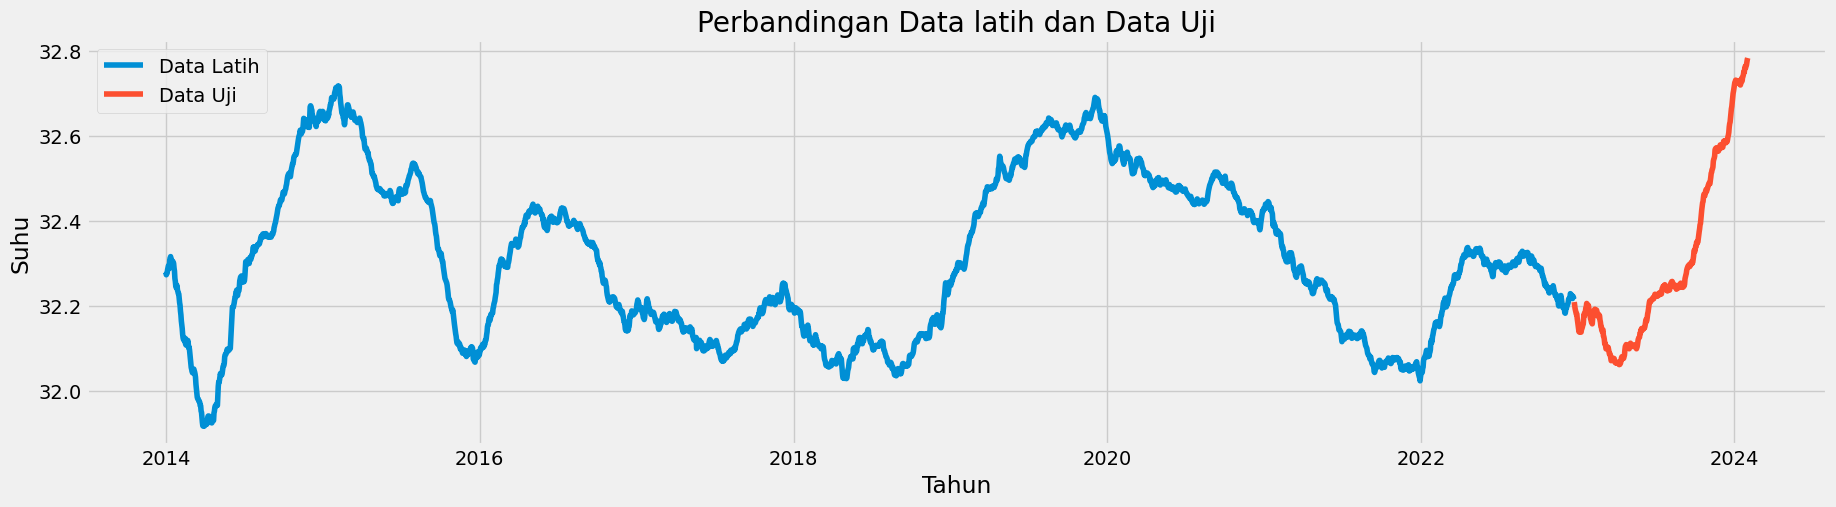

In [24]:
# Visualisasi Hasil pembagian dataset.

rolling_set = dataset['Tx'].rolling(window=365).mean()

plt.figure(figsize= (20, 5))
plt.title('Perbandingan Data latih dan Data Uji')
plt.plot(rolling_set[:train_size], label='Data Latih')
plt.plot(rolling_set[train_size:], label='Data Uji')
plt.xlabel('Tahun')
plt.ylabel('Suhu')
plt.legend()
plt.show()

## Normalisasi Data

In [25]:
# normalisasi data, agar data bisa dengan mudah di kalkulasi oleh mesin / komputer dengan menekan data kedalam rentang tertentu biasa nya rentang 0 sampai 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_untuk_dilatih_scaled = scaler.fit_transform(data_untuk_dilatih)
data_untuk_ditest_scaled = scaler.fit_transform(data_untuk_ditest)

## Membuat Set Pelatihan

In [26]:
# membuat set pelatihan
# dengan contoh ini kita akan memprediksi data ke 15 dengan menggunakan data ke 0 - 14 untuk proses pelatihan.
# kemudian mesin akan menggunakan data ke 1 - 15 untuk memprediksi data ke 16, begitu pula seterusnya.

trainX = []
trainY = []

n_future = 1 # variabel yang akan memprediksi 1 hari kedepan untuk proses pelatihan
n_past = 14 # variabel yang akan menggunakan 14 data terakhir untuk memprediksi data berikutnya,

for i in range(n_past, len(data_untuk_dilatih_scaled) - n_future +1):
    trainX.append(data_untuk_dilatih_scaled[i - n_past:i, 0:data_untuk_dilatih.shape[1]])
    trainY.append(data_untuk_dilatih_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (3630, 14, 5).
trainY shape == (3630, 1).


## Membuat Model LSTM

In [27]:
model = Sequential() # model menggunakan jenis sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) # layer pertama menggunakan Algoritma LSTM dengan 64 Unit neuron dan aktivasi 'Rectified linear unit' atau 'relu'
model.add(LSTM(32, activation='relu', return_sequences=False)) # layer kedua tetap menggunakan algoritma LSTM dengan 32 unit neuron dan aktivasi relu.
model.add(Dropout(0.2)) # layer ketiga adalah dropout untuk menghilangkan sekitar 20% unit neuron secara acak guna menghindari over-vitting (model menjadi pusing karena mencoba menghitung ribuan data didalam 1 neuron sekaligus)
model.add(Dense(trainY.shape[1])) # layer keempat sebagai output atau keluaran dari proses rumit neural network LSTM

model.compile(optimizer='adam', loss='mse') # model akan dikompile menggunakan optimasi adam, yaitu optimasi yang cukup populer di dunia deep learning karena proses komputasi lebih ringan dan memiliki learning rate yang rendah
model.summary() # menampilkan ringkasan desain model yang sudah dibuat

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


### Pelatihan model

In [28]:
history = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.1) # proses pelatihan model di mulai dengan epochs atau perulangan sebanyak 50 kali
# data di split untuk training dan testing/validasi sebanyak 90% Trainig : 10% Validasi
# lalu dataset dipecah menjadi 32 bagian dan menghasilkan sebanyak 114 proses iterasi
# (3644 data latih / 32 = 102.5 atau 103 iterasi)

Epoch 1/50
103/103 [==============================] - 4s 12ms/step - loss: 0.0719 - val_loss: 0.0091
Epoch 2/50
103/103 [==============================] - 1s 10ms/step - loss: 0.0204 - val_loss: 0.0105
Epoch 3/50
103/103 [==============================] - 1s 9ms/step - loss: 0.0190 - val_loss: 0.0089
Epoch 4/50
103/103 [==============================] - 1s 9ms/step - loss: 0.0183 - val_loss: 0.0098
Epoch 5/50
103/103 [==============================] - 1s 9ms/step - loss: 0.0173 - val_loss: 0.0108
Epoch 6/50
103/103 [==============================] - 1s 10ms/step - loss: 0.0167 - val_loss: 0.0087
Epoch 7/50
103/103 [==============================] - 1s 9ms/step - loss: 0.0158 - val_loss: 0.0088
Epoch 8/50
103/103 [==============================] - 1s 9ms/step - loss: 0.0154 - val_loss: 0.0109
Epoch 9/50
103/103 [==============================] - 1s 9ms/step - loss: 0.0156 - val_loss: 0.0084
Epoch 10/50
103/103 [==============================] - 1s 9ms/step - loss: 0.0143 - val_loss: 0.0

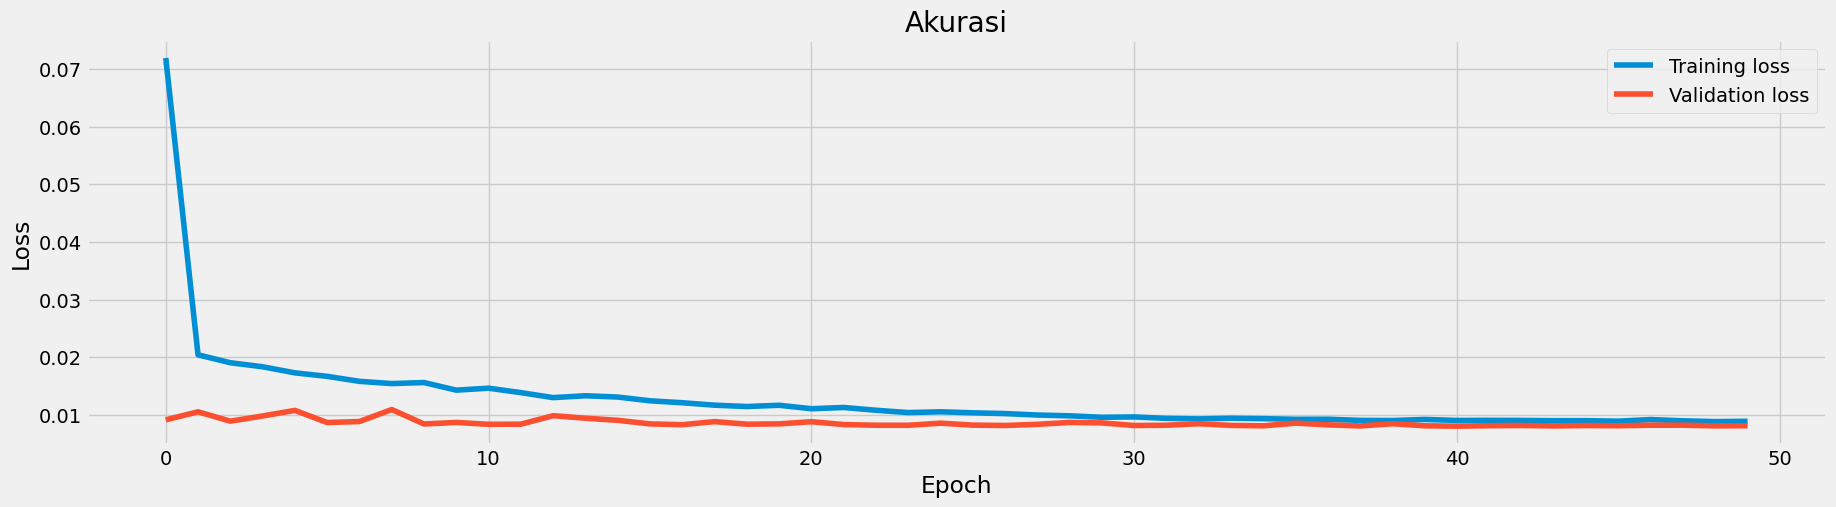

In [29]:
plt.figure(figsize= (20, 5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Prediksi**

## Membuat Set Pengujian

In [30]:
# membuat set pengujian
# dengan contoh ini kita akan memprediksi data ke 15 dengan menggunakan data ke 0 - 14 untuk proses pengujian.
# kemudian mesin akan menggunakan data ke 1 - 15 untuk memprediksi data ke 16, begitu pula seterusnya.

testX = []
testY = []

n_future = 1 # variabel yang akan memprediksi 1 hari kedepan untuk proses pengujian
n_past = 14 # variabel yang akan menggunakan 14 data terakhir untuk memprediksi data berikutnya,

for i in range(n_past, len(data_untuk_ditest_scaled) - n_future +1):
    testX.append(data_untuk_ditest_scaled[i - n_past:i, 0:data_untuk_ditest.shape[1]])
    testY.append(data_untuk_ditest_scaled[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (391, 14, 5).
testY shape == (391, 1).


In [31]:
future = 367 # variabel untuk menentukan berapa banyak data yang akan diprediksi ke masa depan
forecast_periode_tanggal = pd.date_range(list(climate_data.index)[-1], periods=future, freq='1d').tolist() # untuk mengambil periode 'tanggalan' dari dataset original yaitu climate_data

In [32]:
# print(forecast_periode_tanggal)

In [33]:
forecast = model.predict(testX[-future:]) # melakukan proses prediksi 365 hari ke masa depan

12/12 [==============================] - 0s 3ms/step


In [34]:
# melakukan denormaliasi yaitu proses merubah nilai data ke bentuk/skala yang asli

forecast_copies = np.repeat(forecast, 5, axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [35]:
# Membuat tabel untuk menyimpan data hasil prediksi agar lebih mudah untuk dilihat dan di plotting

data_hasil = pd.DataFrame(y_pred_future, columns=['Prediksi']) # membuat konversi hasil dari perhitungan ke dalam bentuk tabel
data_hasil['Tanggal'] = forecast_periode_tanggal # Menambahkan tanggalan agar data mudah dibaca
data_hasil.set_index('Tanggal', inplace=True) # menjadikan tanggalan sebagai index karena dataset berupa timeseries

In [36]:
data_hasil

,Prediksi
Tanggal,
2024-02-01,32.007599
2024-02-02,31.625923
2024-02-03,31.577362
2024-02-04,31.103300
2024-02-05,31.407013
...,...
2025-01-28,32.033733
2025-01-29,32.093410
2025-01-30,31.390209


## Visualisasi Hasil Prediksi

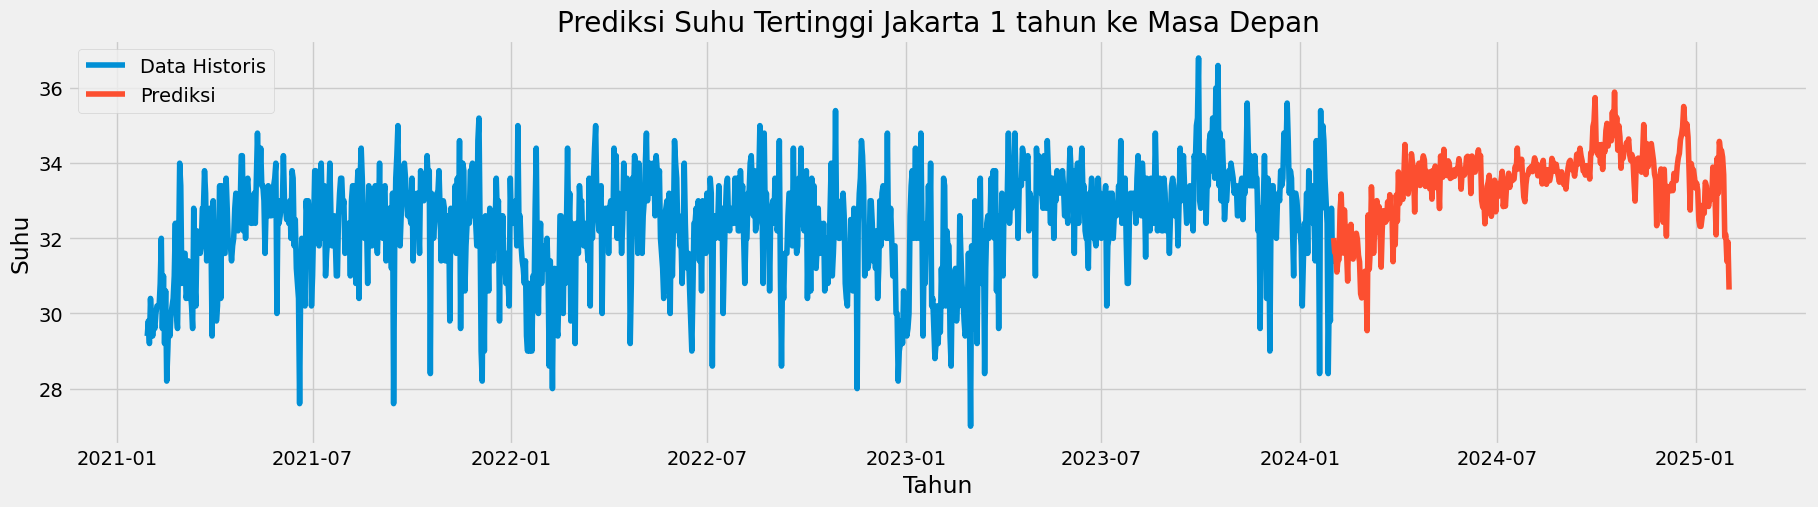

In [37]:
plt.figure(figsize=(20, 5))
plt.plot(climate_data['Tx'][2950:], label='Data Historis')
plt.plot(data_hasil['Prediksi'], label='Prediksi')
plt.title('Prediksi Suhu Tertinggi Jakarta 1 tahun ke Masa Depan')
plt.xlabel('Tahun')
plt.ylabel('Suhu')
plt.legend()
plt.show()

In [38]:
climate_data.iloc[4017] # untuk menampilkan detail dari data di tanggal 1 Januari 2024

Tn          26.4
Tx          32.2
Tavg        29.6
RH_avg      77.0
RR           1.8
ss           5.6
ff_x         4.0
ddd_x      290.0
ff_avg       1.0
ddd_car       C 
Name: 2024-01-01 00:00:00, dtype: object

In [39]:
data_hasil.iloc[335] # untuk menampilkan detail dari data di tanggal 1 Januari 2025

Prediksi    33.336895
Name: 2025-01-01 00:00:00, dtype: float32

In [40]:
data_hasil.describe()

,Prediksi
count,367.000000
mean,33.460758
std,0.952557
min,29.542767
25%,33.034765
50%,33.677727
75%,34.027477
max,35.892307


In [41]:
climate_data['Tx'].describe()

count    4049.000000
mean       32.327785
std         1.540496
min        23.800000
25%        31.600000
50%        32.500000
75%        33.400000
max        37.000000
Name: Tx, dtype: float64

## Perhitungan Anomali atau Selisih Kenaikkan Suhu

In [42]:
mean_asli = climate_data['Tx'].mean() # mengambil nilai rata-rata dari kolom "Suhu tertinggi"
mean_prediksi = data_hasil['Prediksi'].mean() # mengambil nilai rata-rata dari kolom "Prediksi"

print(f'Average Suhu Tertinggi: {round(mean_asli, 2)}')
print(f'Average Suhu Tertinggi Prediksi: {round(mean_prediksi, 2)}')

Average Suhu Tertinggi: 32.33
Average Suhu Tertinggi Prediksi: 33.459999084472656


In [43]:
anomali_suhu_hari = data_hasil['Prediksi'].iloc[335] - climate_data['Tx'].iloc[4017]
anomali_suhu_rata_rata = mean_prediksi - mean_asli

print(f'Selisih Suhu tanggal (2024-01-01 dan 2025-01-01): \n{round(anomali_suhu_hari, 2)} Derajat Celcius')

Selisih Suhu tanggal (2024-01-01 dan 2025-01-01): 
1.14 Derajat Celcius


In [44]:
print(f'Selisih Kenaikan Suhu Tertinggi rata-rata selama 1 tahun (2024 - 2025): \n{round(anomali_suhu_rata_rata, 2)} Derajat Celcius')

Selisih Kenaikan Suhu Tertinggi rata-rata selama 1 tahun (2024 - 2025): 
1.13 Derajat Celcius


In [45]:
selisih = pd.DataFrame(data=[[mean_prediksi, mean_asli, anomali_suhu_rata_rata]], 
                       columns=['Tx_avg_prediksi', 'Tx_avg', 'Selisih / Anomali'])

print('Tabel Anomali atau Selisih kenaikkan Suhu: ')
selisih

Tabel Anomali atau Selisih kenaikkan Suhu: 


,Tx_avg_prediksi,Tx_avg,Selisih / Anomali
0,33.460758,32.327785,1.132974


# Evaluasi Model LSTM

### Evaluasi Kinerja Pelatihan Model

In [46]:
evaluasi_latih = model.predict(trainX)
evaluasi_latih.shape

114/114 [==============================] - 0s 3ms/step


(3630, 1)

In [47]:
evaluasi_latih_copies = np.repeat(evaluasi_latih, 5, axis=-1)
evaluasi_latih = scaler.inverse_transform(evaluasi_latih_copies)[:,0]
evaluasi_latih.shape

(3630,)

In [48]:
trainY = np.repeat(trainY, 5, axis=-1)
trainY = scaler.inverse_transform(trainY)[:,0]
trainY.shape

(3630,)

In [49]:
dataX = pd.DataFrame(trainY, columns=['Aktual'])
dataX['Prediksi'] = evaluasi_latih
dataX

,Aktual,Prediksi
0,31.603030,31.748207
1,30.712121,31.479061
2,29.821212,31.078119
3,30.415152,30.214535
4,33.236364,31.335529
...,...,...
3625,33.087879,33.436729
3626,32.345455,33.382317
3627,32.939394,33.151016
3628,32.939394,33.140060


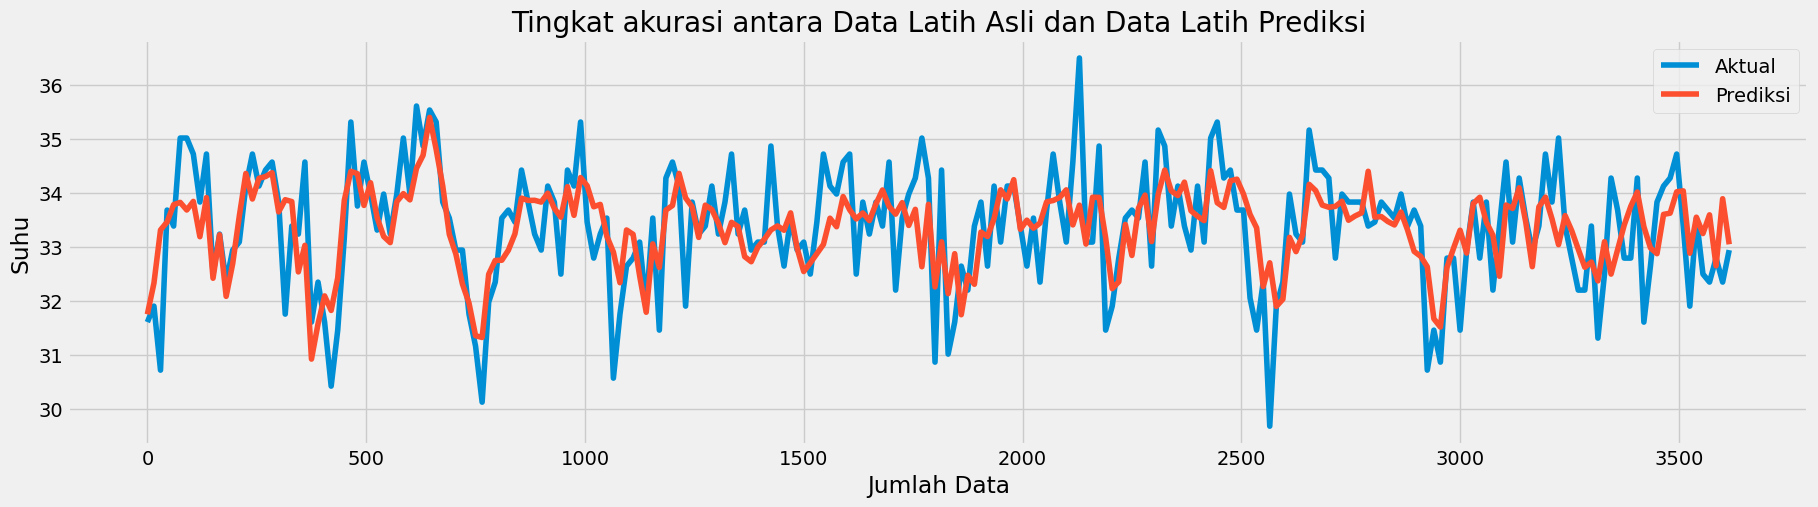

In [50]:
plt.figure(figsize= (20,5))
plt.title('Tingkat akurasi antara Data Latih Asli dan Data Latih Prediksi')
plt.plot(dataX['Aktual'][::15], label='Aktual')
plt.plot(dataX['Prediksi'][::15], label='Prediksi')
plt.xlabel('Jumlah Data')
plt.ylabel('Suhu')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(trainY, evaluasi_latih)
mse = mean_squared_error(trainY, evaluasi_latih)
mae = mean_absolute_error(trainY, evaluasi_latih)
rmse = np.sqrt(mse)

print(f'MAE = {round(mae, 4)}')
print(f'MAPE = {round(mape, 2)}% \n')
print(f"MSE = {round(mse, 4)}")
print(f"RMSE = {round(rmse, 4)}")

MAE = 0.6628
MAPE = 2.01% 

MSE = 0.7935
RMSE = 0.8908


### Evaluasi Kinerja Pengujian Model

In [52]:
evaluasi_uji = model.predict(testX)
evaluasi_uji.shape

13/13 [==============================] - 0s 4ms/step


(391, 1)

In [53]:
evaluasi_uji_copies = np.repeat(evaluasi_uji, 5, axis=-1)
evaluasi_uji = scaler.inverse_transform(evaluasi_uji_copies)[:,0]
evaluasi_uji.shape

(391,)

In [54]:
testY = np.repeat(testY, 5, axis=-1)
testY = scaler.inverse_transform(testY)[:,0]
testY.shape

(391,)

In [55]:
dataY = pd.DataFrame(testY, columns=['Aktual'])
dataY['Prediksi'] = evaluasi_uji
dataY

,Aktual,Prediksi
0,33.8,33.056984
1,32.0,33.026150
2,32.6,32.630482
3,34.4,32.935173
4,32.0,33.713001
...,...,...
386,30.6,32.033733
387,29.8,32.093410
388,32.8,31.390209
389,31.4,31.902452


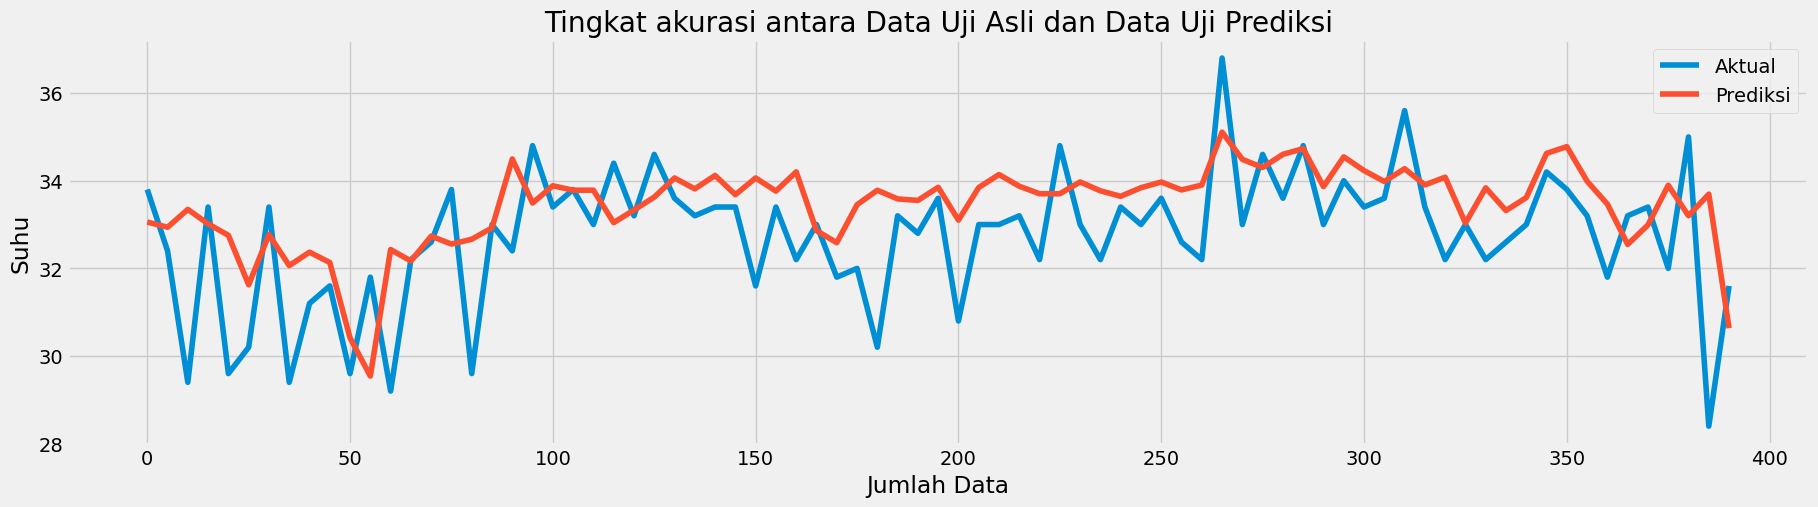

In [56]:
plt.figure(figsize= (20,5))
plt.title('Tingkat akurasi antara Data Uji Asli dan Data Uji Prediksi')
plt.plot(dataY['Aktual'][::5], label='Aktual')
plt.plot(dataY['Prediksi'][::5], label='Prediksi')
plt.xlabel('Jumlah Data')
plt.ylabel('Suhu')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(testY, evaluasi_uji)
mse = mean_squared_error(testY, evaluasi_uji)
mae = mean_absolute_error(testY, evaluasi_uji)
rmse = np.sqrt(mse)


print(f'MAE = {round(mae, 4)}')
print(f'MAPE = {round(mape, 2)}% \n')
print(f"MSE = {round(mse, 4)}")
print(f"RMSE = {round(rmse, 4)}")

MAE = 1.0565
MAPE = 3.31% 

MSE = 1.8608
RMSE = 1.3641
